In [1]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ANUSHA\\AppData\\Roaming\\Python\\Python39\\site-packages\\~cipy.libs\\libopenblas_v0.3.27--3aa239bc726cfb0bd8e5330d8d4c15c6.dll'
Check the permissions.



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pycaret.regression import setup, compare_models, create_model, evaluate_model
from sklearn.model_selection import cross_val_score

In [25]:
df = pd.read_csv('C:/Users/ANUSHA/Downloads/KNN.csv')

In [26]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,NaN
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,NaN
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,NaN


In [27]:
df.shape

(131, 10)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Gender           131 non-null    object 
 1    Age              131 non-null    int64  
 2    Height (cm)      131 non-null    int64  
 3    Weight (kg)      131 non-null    int64  
 4    Occupation       131 non-null    object 
 5    Education Level  131 non-null    object 
 6    Marital Status   131 non-null    object 
 7    Income (USD)     131 non-null    int64  
 8    Favorite Color   131 non-null    object 
 9   Unnamed: 9        0 non-null      float64
dtypes: float64(1), int64(4), object(5)
memory usage: 10.4+ KB


In [29]:
df.describe()

,Age,Height (cm),Weight (kg),Income (USD),Unnamed: 9
count,131.000000,131.000000,131.000000,131.000000,0.0
mean,34.564885,173.198473,71.458015,93206.106870,NaN
std,5.984723,8.045467,12.648052,74045.382919,NaN
min,24.000000,160.000000,50.000000,30000.000000,NaN
25%,29.000000,166.000000,60.000000,55000.000000,NaN
50%,34.000000,175.000000,75.000000,75000.000000,NaN
75%,39.000000,180.500000,83.000000,100000.000000,NaN
max,52.000000,190.000000,94.000000,500000.000000,NaN


In [30]:
df.drop(['Unnamed: 9'], axis = 1, inplace = True)
df

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow
5,male,45,190,92,Business Consultant,Master's Degree,Divorced,110000,Black
6,female,27,163,55,Marketing Specialist,Bachelor's Degree,Single,50000,Pink
7,male,52,179,83,CEO,Doctorate Degree,Married,500000,Blue
8,female,31,168,61,Project Manager,Bachelor's Degree,Married,80000,Green
9,male,36,177,76,Engineer,Master's Degree,Married,95000,Orange


In [31]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

[' Gender',
 ' Occupation',
 ' Education Level',
 ' Marital Status',
 ' Favorite Color']

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols: 
    # Encode values in training set
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [33]:
df.isnull().any()

Gender             False
Age                False
Height (cm)        False
Weight (kg)        False
Occupation         False
Education Level    False
Marital Status     False
Income (USD)       False
Favorite Color     False
dtype: bool

In [34]:
df.corr()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
Gender,1.000000,0.320236,0.417210,0.420043,0.696525,0.883911,0.785893,0.099271,0.696996
Age,0.320236,1.000000,0.726308,0.784738,-0.175900,0.220823,-0.135039,0.662278,-0.013207
Height (cm),0.417210,0.726308,1.000000,0.975157,-0.167029,0.208090,-0.141778,0.456217,-0.084310
Weight (kg),0.420043,0.784738,0.975157,1.000000,-0.188074,0.200688,-0.156897,0.486022,-0.090207
Occupation,0.696525,-0.175900,-0.167029,-0.188074,1.000000,0.771409,0.872901,-0.234879,0.751068
Education Level,0.883911,0.220823,0.208090,0.200688,0.771409,1.000000,0.820698,0.074108,0.743115
Marital Status,0.785893,-0.135039,-0.141778,-0.156897,0.872901,0.820698,1.000000,-0.183237,0.834993
Income (USD),0.099271,0.662278,0.456217,0.486022,-0.234879,0.074108,-0.183237,1.000000,-0.111655
Favorite Color,0.696996,-0.013207,-0.084310,-0.090207,0.751068,0.743115,0.834993,-0.111655,1.000000


<Axes: >

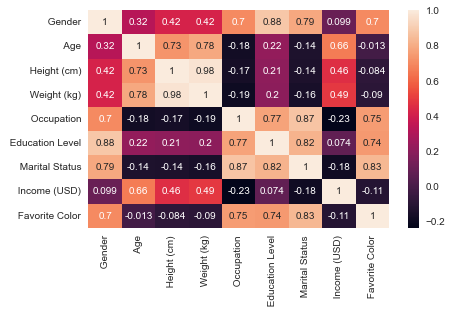

In [35]:
sns.heatmap(df.corr(), annot = True)

In [36]:
class_counts = df[' Gender'].value_counts()
print('Class distribution:')
print(class_counts)

Class distribution:
 Gender
3    41
2    39
1    27
0    24
Name: count, dtype: int64


In [37]:
def data_cleaning_suggestions(df):
    print("Basic Information:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    print("\nDuplicate Rows:")
    print(df.duplicated().sum())
    
    print("\nDescriptive Statistics:")
    print(df.describe())
    
    print("\nColumns with High Cardinality (Unique Values):")
    for col in df.columns:
        if df[col].nunique() > 50:
            print(f"  - {col}: {df[col].nunique()} unique values")
    
    print("\nPotential Outliers (Z-score > 3):")
    numerical_cols = df.select_dtypes(include=np.number)
    z_scores = np.abs(stats.zscore(numerical_cols))
    outliers = (z_scores > 3).sum(axis=0)
    print(outliers)

data_cleaning_suggestions(df)
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

df.drop_duplicates(inplace=True)
numerical_cols = df.select_dtypes(include=np.number)
for col in numerical_cols.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower_limit, upper_limit)

print("\nCleaned Dataset Preview:")
print(df.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0    Gender           131 non-null    int32
 1    Age              131 non-null    int64
 2    Height (cm)      131 non-null    int64
 3    Weight (kg)      131 non-null    int64
 4    Occupation       131 non-null    int32
 5    Education Level  131 non-null    int32
 6    Marital Status   131 non-null    int32
 7    Income (USD)     131 non-null    int64
 8    Favorite Color   131 non-null    int32
dtypes: int32(5), int64(4)
memory usage: 6.8 KB
None

Missing Values:
Gender             0
Age                0
Height (cm)        0
Weight (kg)        0
Occupation         0
Education Level    0
Marital Status     0
Income (USD)       0
Favorite Color     0
dtype: int64

Duplicate Rows:
1

Descriptive Statistics:
         Gender        Age     Height (cm)  Weight (kg)  Occupatio

In [38]:
data_cleaning_suggestions(df)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 0 to 130
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0    Gender           130 non-null    int32
 1    Age              130 non-null    int64
 2    Height (cm)      130 non-null    int64
 3    Weight (kg)      130 non-null    int64
 4    Occupation       130 non-null    int32
 5    Education Level  130 non-null    int32
 6    Marital Status   130 non-null    int32
 7    Income (USD)     130 non-null    int64
 8    Favorite Color   130 non-null    int32
dtypes: int32(5), int64(4)
memory usage: 7.6 KB
None

Missing Values:
Gender             0
Age                0
Height (cm)        0
Weight (kg)        0
Occupation         0
Education Level    0
Marital Status     0
Income (USD)       0
Favorite Color     0
dtype: int64

Duplicate Rows:
0

Descriptive Statistics:
         Gender        Age     Height (cm)  Weight (kg)  Occupation  \


In [39]:
X = df.drop(' Gender', axis = 1)
y = df[' Gender']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print('Class distribution before resampling:', y_train.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling:  Gender
3    33
2    31
1    22
0    18
Name: count, dtype: int64
Class distribution after resampling:  Gender
2    33
0    33
1    33
3    33
Name: count, dtype: int64


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 1.0

Confusion Matrix:
[[6 0 0 0]
 [0 5 0 0]
 [0 0 8 0]
 [0 0 0 7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26


Accuracy Score:
1.0


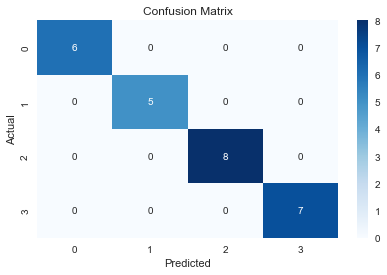

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 21), 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski']}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_res, y_train_res)
y_pred = best_knn.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()